In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno



## Exploración inicial

In [3]:
df = pd.read_csv('../data/student_habits_performance.csv')

In [4]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [6]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## Analisis de valores Nulos

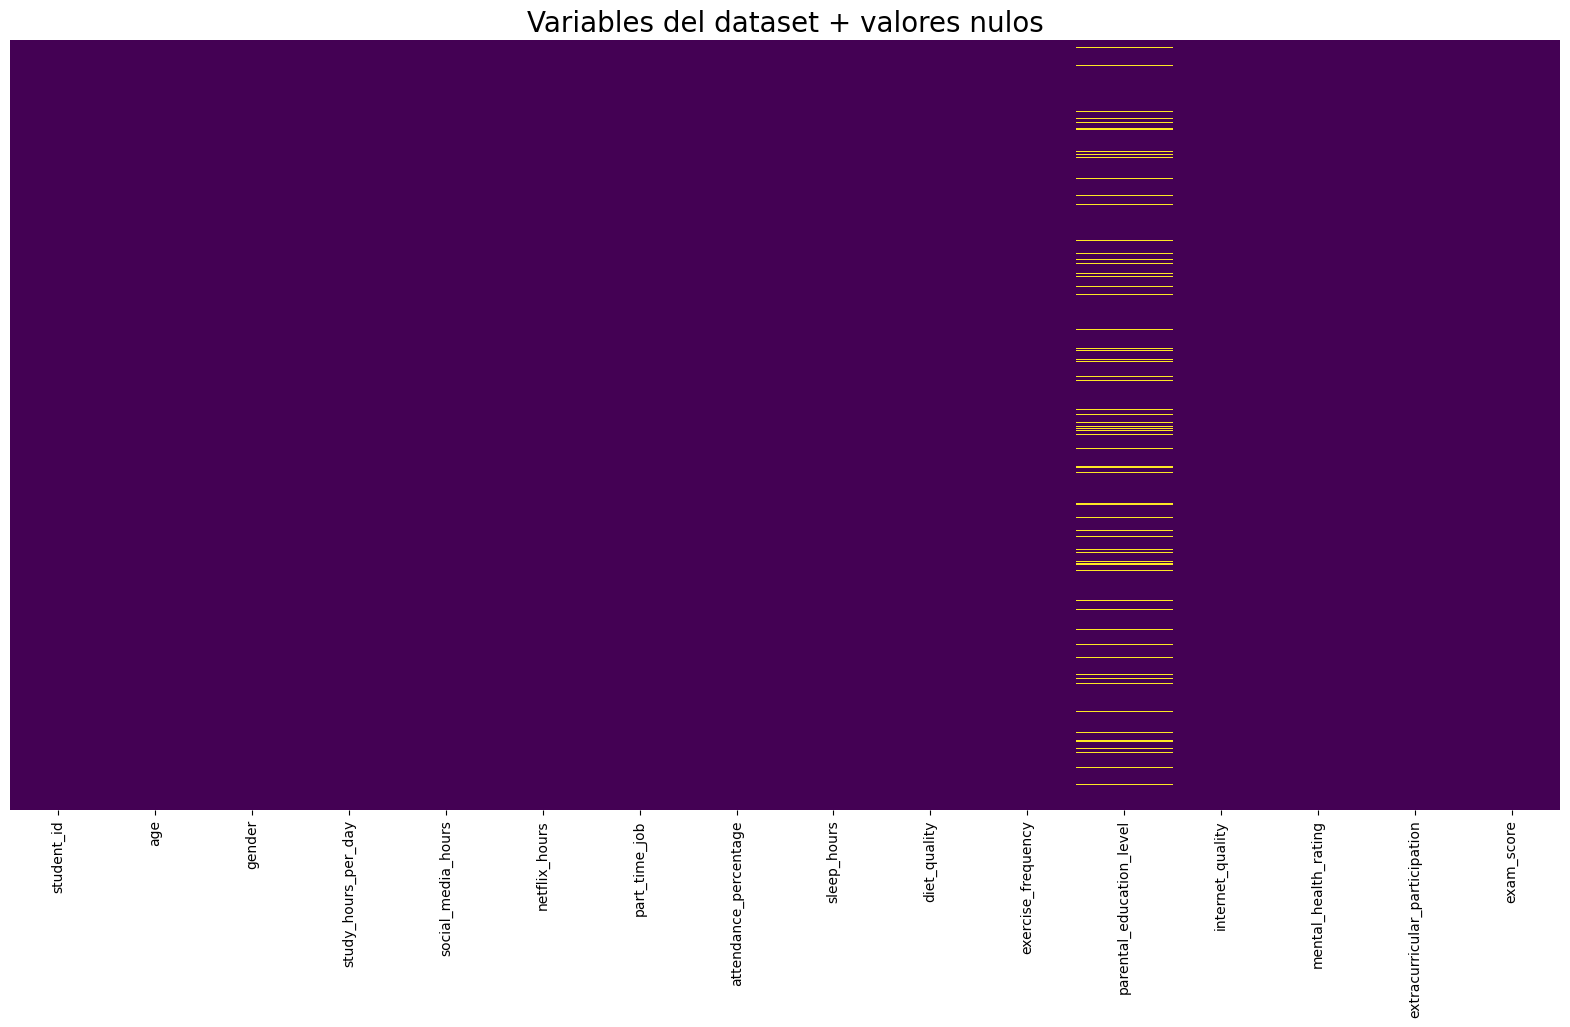

In [7]:

plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.title('Variables del dataset + valores nulos', fontsize=20)
plt.show()

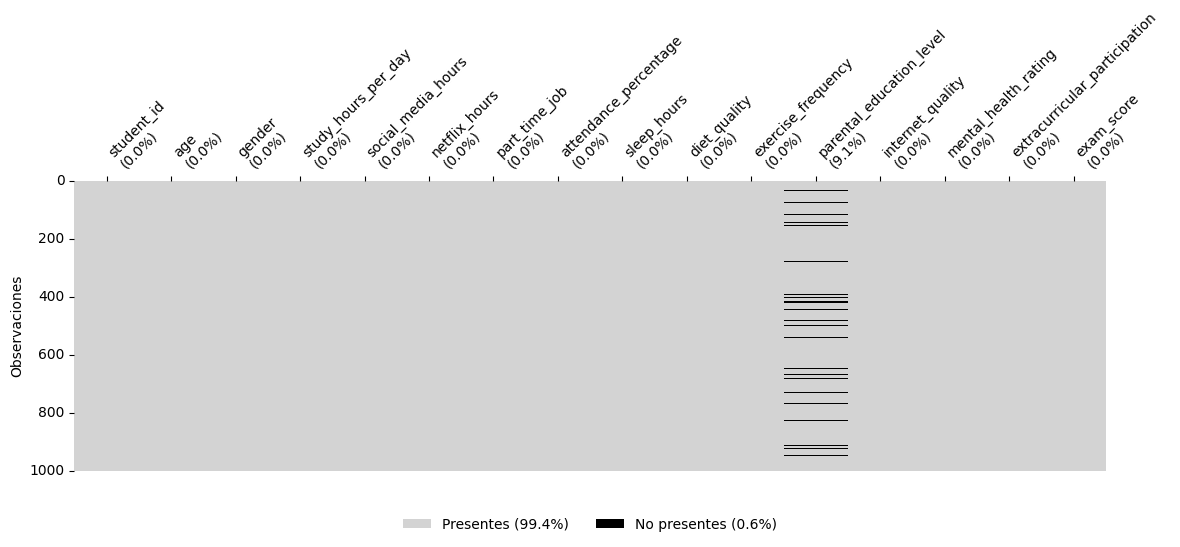

In [8]:
# matriz booleana
missing_matrix = ~df.isnull()

# convertimos a 0/1
plot_data = missing_matrix.astype(int)

# se crea el grafico de calor
plt.figure(figsize=(12, 6))
sns.heatmap(plot_data, cbar=False, cmap=['black', 'lightgrey'], linewidths=0.0)

# calculo de porcentajes de valores faltantes
missing_percent = df.isnull().mean() * 100
labels = [f"{col}\n({missing_percent[col]:.1f}%)" for col in df.columns]

# configuracion de informacion en los ejes
plt.xticks(ticks=np.arange(len(df.columns)) + 0.5, labels=labels, rotation=45, ha='left')
plt.yticks(np.linspace(0, df.shape[0], 6), labels=np.linspace(0, df.shape[0], 6, dtype=int))
plt.xlabel("")
plt.ylabel("Observaciones")
plt.title("")

# eitque de los ejes x haba arriba
plt.gca().xaxis.tick_top()
plt.gca().tick_params(axis='x', which='both', bottom=False, top=True, labeltop=True, labelbottom=False)

# se agregan las leyendas
present_pct = 100 - df.isnull().stack().mean() * 100
missing_pct = 100 - present_pct
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgrey', label=f'Presentes ({present_pct:.1f}%)'),
    Patch(facecolor='black', label=f'No presentes ({missing_pct:.1f}%)')
]
plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)

plt.tight_layout()
plt.show()

In [9]:
df["parental_education_level"].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

### Imputar valores nulos, de "parental_education_level" mediante la moda

In [10]:
# Nulos por la moda
df["parental_education_level"] = df["parental_education_level"].fillna(df["parental_education_level"].mode()[0])

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

### Analisis de imbalances

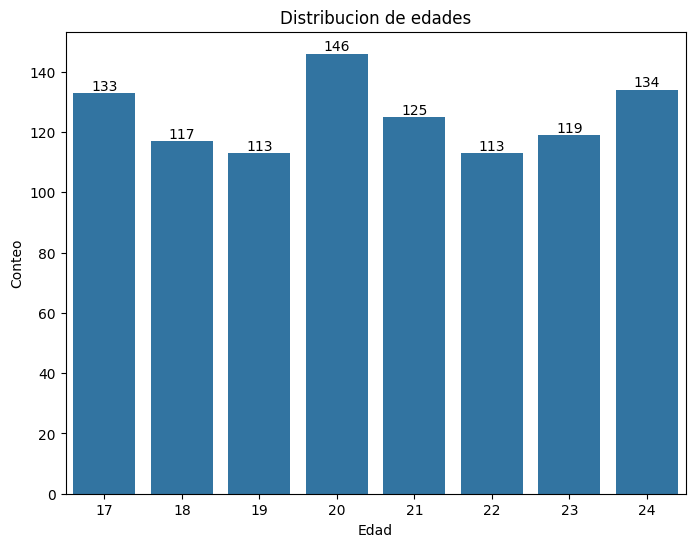


Porcentaje de distribucion de edades:
Edad 17: 13.30%
Edad 18: 11.70%
Edad 19: 11.30%
Edad 20: 14.60%
Edad 21: 12.50%
Edad 22: 11.30%
Edad 23: 11.90%
Edad 24: 13.40%


In [12]:
# analisis de imbalances
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age')
plt.title('Distribucion de edades')
plt.xlabel('Edad')
plt.ylabel('Conteo')

# Add count labels on top of each bar
for i in plt.gca().containers:
    plt.gca().bar_label(i)

plt.show()

# porcentaje de distribucion
distribucion_edades = df['age'].value_counts(normalize=True) * 100
# print(distribucion_edades)
print("\nPorcentaje de distribucion de edades:")
print(f"Edad 17: {distribucion_edades[17]:.2f}%")
print(f"Edad 18: {distribucion_edades[18]:.2f}%")
print(f"Edad 19: {distribucion_edades[19]:.2f}%")
print(f"Edad 20: {distribucion_edades[20]:.2f}%")
print(f"Edad 21: {distribucion_edades[21]:.2f}%")
print(f"Edad 22: {distribucion_edades[22]:.2f}%")
print(f"Edad 23: {distribucion_edades[23]:.2f}%")
print(f"Edad 24: {distribucion_edades[24]:.2f}%")


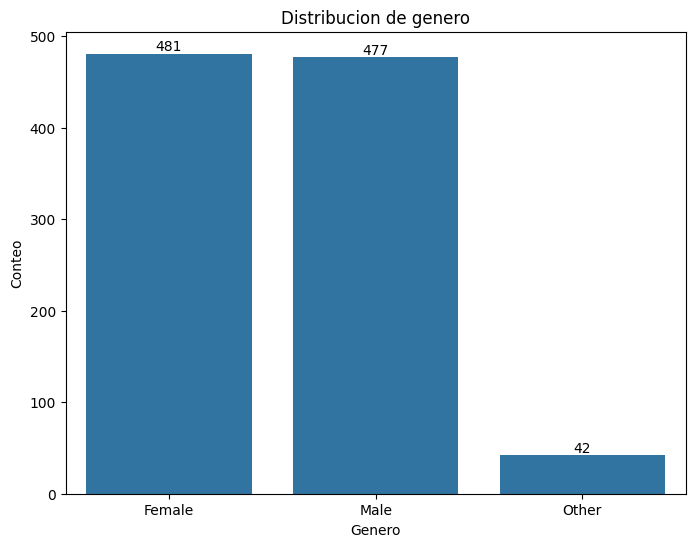


Distribucion de genero:
Hombres: 47.70%
Mujeres: 48.10%
Otro: 4.20%


In [13]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Distribucion de genero')
plt.xlabel('Genero')
plt.ylabel('Conteo')

for i in plt.gca().containers:
    plt.gca().bar_label(i)

plt.show()



distribucion_genero = df['gender'].value_counts(normalize=True) * 100
print("\nDistribucion de genero:")
print(f"Hombres: {distribucion_genero['Male']:.2f}%")
print(f"Mujeres: {distribucion_genero['Female']:.2f}%")
print(f"Otro: {distribucion_genero['Other']:.2f}%")

# limpieza
df = df[df['gender'] != 'Other']


In [14]:
df.part_time_job.value_counts()

part_time_job
No     753
Yes    205
Name: count, dtype: int64

In [15]:
df.diet_quality.value_counts()

diet_quality
Fair    419
Good    364
Poor    175
Name: count, dtype: int64

In [16]:
df.exercise_frequency.value_counts()

exercise_frequency
3    148
6    146
1    142
5    142
0    135
4    128
2    117
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     958 non-null    object 
 1   age                            958 non-null    int64  
 2   gender                         958 non-null    object 
 3   study_hours_per_day            958 non-null    float64
 4   social_media_hours             958 non-null    float64
 5   netflix_hours                  958 non-null    float64
 6   part_time_job                  958 non-null    object 
 7   attendance_percentage          958 non-null    float64
 8   sleep_hours                    958 non-null    float64
 9   diet_quality                   958 non-null    object 
 10  exercise_frequency             958 non-null    int64  
 11  parental_education_level       958 non-null    object 
 12  internet_quality               958 non-null    object 


In [18]:
df.internet_quality.value_counts()

internet_quality
Good       425
Average    377
Poor       156
Name: count, dtype: int64

In [19]:
df.mental_health_rating.value_counts()

mental_health_rating
4     106
6     104
8     101
1     100
3      99
10     96
5      95
2      89
7      85
9      83
Name: count, dtype: int64

In [20]:
df.extracurricular_participation.value_counts()

extracurricular_participation
No     654
Yes    304
Name: count, dtype: int64